# word vector 작성

- skipgram, window size 2

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

### Toy 말뭉치

In [2]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

### stopword 제거

In [3]:
stop_words = ['is', 'a', 'will', 'be']
results = []

for text in corpus:
    tmp = text.split(' ')
    for stop_word in stop_words:
        if stop_word in tmp:
            tmp.remove(stop_word)
    results.append(" ".join(tmp))

In [4]:
corpus = results
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

### vocaburary 모음 작성

In [5]:
words = []

for sentence in corpus:
    for word in sentence.split(' '):
        words.append(word)

words = set(words)
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

### word-to-index, index-to-word 작성

- word 를 index 로 변환  

- sentence 를 word index 로 변환  

- window size 에 따라 train data 생성

In [6]:
word2index = dict((w, i) for i, w in enumerate(words))
index2word = dict((i, w) for i, w in enumerate(words))

In [7]:
word2index

{'pretty': 0,
 'wise': 1,
 'prince': 2,
 'young': 3,
 'man': 4,
 'king': 5,
 'queen': 6,
 'boy': 7,
 'princess': 8,
 'girl': 9,
 'strong': 10,
 'woman': 11}

In [8]:
index2word

{0: 'pretty',
 1: 'wise',
 2: 'prince',
 3: 'young',
 4: 'man',
 5: 'king',
 6: 'queen',
 7: 'boy',
 8: 'princess',
 9: 'girl',
 10: 'strong',
 11: 'woman'}

### skip-gram 으로 training data 생성

In [9]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [10]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [11]:
data[:10]

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman']]

In [12]:
import pandas as pd

df = pd.DataFrame(data, columns = ['input', 'label'])
df.head()

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king


### One hot encoding

In [13]:
len(words)

12

In [14]:
# function to convert numbers to one hot vectors
def to_one_hot_encoding(index):
    one_hot_encoding = np.zeros(12)
    one_hot_encoding[index] = 1
    return one_hot_encoding

### One hot encoding 된 train, label data

In [15]:
X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2index[x]))
    Y.append(to_one_hot_encoding(word2index[y] ))

In [16]:
print(X[:2])
print(Y[:2])

[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])]
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])]


In [17]:
# convert them to numpy arrays
X_train = np.asarray(X).astype("float32")
Y_train = np.asarray(Y).astype("float32")

In [18]:
model = Sequential()
model.add(Dense(2, input_dim=12))
model.add(Dense(12))

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.fit(X_train, Y_train, epochs=2000, batch_size=3)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2000
52/52 [==============================] - 0s 8ms/sample - loss: 7.9170 - acc: 0.1154
Epoch 2/2000
52/52 [==============================] - 0s 980us/sample - loss: 6.8258 - acc: 0.1154
Epoch 3/2000
52/52 [==============================] - 0s 904us/sample - loss: 6.0109 - acc: 0.0962
Epoch 4/2000
52/52 [==============================] - 0s 865us/sample - loss: 5.6146 - acc: 0.1154
Epoch 5/2000
52/52 [==============================] - 0s 885us/sample - loss: 6.4130 - acc: 0.0962
Epoch 6/2000
52/52 [==============================] - 0s 865us/sample - loss: 7.1064 - acc: 0.1154
Epoch 7/2000
52/52 [==============================] - 0s 865us/sample - loss: 9.7041 - acc: 0.1154
Epoch 8/2000
52/52 [==============================] - 0s 904us/sample - loss: 9.6882 - acc: 0.1154
Epoch 9/2000
52/52 [==============================] - 0s 885us/sample - loss: 9.3585 - acc: 0.1154
Epoch 10/2000
52/52 [==============================] - 0s 846us

52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 81/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 82/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 83/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 84/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 85/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 86/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 87/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 88/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 89/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 90/2000


52/52 [==============================] - 0s 904us/sample - loss: 8.9889 - acc: 0.1154
Epoch 162/2000
52/52 [==============================] - 0s 904us/sample - loss: 8.9889 - acc: 0.1154
Epoch 163/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 164/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 165/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 166/2000
52/52 [==============================] - ETA: 0s - loss: 10.7454 - acc: 0.0000e+ - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 167/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 168/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 169/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 170/2000
52/52 [==============================] - 0s 865us

52/52 [==============================] - 0s 866us/sample - loss: 8.9889 - acc: 0.1154
Epoch 242/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 243/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 244/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 245/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 246/2000
52/52 [==============================] - 0s 923us/sample - loss: 8.9889 - acc: 0.1154
Epoch 247/2000
52/52 [==============================] - 0s 904us/sample - loss: 8.9889 - acc: 0.1154
Epoch 248/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 249/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 250/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch

52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 323/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 324/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 325/2000
52/52 [==============================] - 0s 942us/sample - loss: 8.9889 - acc: 0.1154
Epoch 326/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 327/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 328/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 329/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 330/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 331/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 3

52/52 [==============================] - 0s 942us/sample - loss: 8.9889 - acc: 0.1154
Epoch 404/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 405/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 406/2000
52/52 [==============================] - 0s 981us/sample - loss: 8.9889 - acc: 0.1154
Epoch 407/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 408/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 409/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 410/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 411/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 412/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch

52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 485/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 486/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 487/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 488/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 489/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 490/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 491/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 492/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 493/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 494/2000
52

52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 566/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 567/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 568/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 569/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 570/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 571/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 572/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 573/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 574/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch

52/52 [==============================] - 0s 923us/sample - loss: 8.9889 - acc: 0.1154
Epoch 647/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 648/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 649/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 650/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 651/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 652/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 653/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 654/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 655/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch

52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 728/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 729/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 730/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 731/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 732/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 733/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 734/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 735/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 736/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch

52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 809/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 810/2000
52/52 [==============================] - 0s 769us/sample - loss: 8.9889 - acc: 0.1154
Epoch 811/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 812/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 813/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 814/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 815/2000
52/52 [==============================] - 0s 923us/sample - loss: 8.9889 - acc: 0.1154
Epoch 816/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 817/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch

52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 890/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 891/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 892/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 893/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 894/2000
52/52 [==============================] - 0s 904us/sample - loss: 8.9889 - acc: 0.1154
Epoch 895/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 896/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 897/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 898/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch

52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 971/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 972/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 973/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 974/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 975/2000
52/52 [==============================] - 0s 923us/sample - loss: 8.9889 - acc: 0.1154
Epoch 976/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 977/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 978/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 979/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch

52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1051/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154 
Epoch 1052/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1053/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1054/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1055/2000
52/52 [==============================] - 0s 923us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1056/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1057/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1058/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1059/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epo

52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1131/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1132/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1133/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1134/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1135/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1136/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1137/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1138/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1139/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1

52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1211/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1212/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1213/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1214/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1215/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1216/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1217/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1218/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1219/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1

52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1291/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1292/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1293/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1294/2000
52/52 [==============================] - 0s 961us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1295/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1296/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1297/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1298/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1299/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Ep

52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1371/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1372/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1373/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1374/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1375/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1376/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1377/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1378/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1379/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1

52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1451/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1452/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1453/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1454/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1455/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1456/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1457/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1458/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1459/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1

52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1531/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1532/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1533/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1534/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1535/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1536/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1537/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1538/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1539/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.115

52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1611/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1612/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1613/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1614/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1615/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1616/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1617/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1618/2000
52/52 [==============================] - 0s 885us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1619/2000
52/52 [==============================] - 0s 942us/sample - loss: 8.9889 - acc: 0.1

52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1691/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1692/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1693/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1694/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1695/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1696/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1697/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1698/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1699/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1

52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1771/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1772/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1773/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1774/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1775/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1776/2000
52/52 [==============================] - 0s 788us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1777/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1778/2000
52/52 [==============================] - 0s 865us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1779/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1

52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1850/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1851/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1852/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1853/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1854/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1855/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1856/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1857/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1858/2000
52/52 [==============================] - 0s 1ms/sample - loss: 8.9889 - acc: 0.1154
Epoch 1859

52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1930/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1931/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1932/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1933/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1934/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1935/2000
52/52 [==============================] - 0s 808us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1936/2000
52/52 [==============================] - 0s 827us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1937/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1154
Epoch 1938/2000
52/52 [==============================] - 0s 846us/sample - loss: 8.9889 - acc: 0.1

### 첫번째 Hidden Layer 추출 및 weight + bias 를 vector 로 합산

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 26        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                36        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers[0].get_weights()[0] + model.layers[0].get_weights()[1]

array([[-0.859418  , -0.09191144],
       [-0.65558934,  0.33223855],
       [-0.86080176, -0.05509416],
       [-0.78316224, -0.18013023],
       [-0.00545022,  0.3143767 ],
       [-0.05450249,  0.36600542],
       [-0.6754624 ,  0.24355175],
       [-0.1053561 , -0.6657699 ],
       [-0.35594386,  0.43655568],
       [ 0.18464369, -0.5044595 ],
       [-0.16097543, -0.7065134 ],
       [-0.93745816,  0.39896506]], dtype=float32)

In [22]:
vectors= model.layers[0].get_weights()[0] + model.layers[0].get_weights()[1]
vectors[:5]

array([[-0.859418  , -0.09191144],
       [-0.65558934,  0.33223855],
       [-0.86080176, -0.05509416],
       [-0.78316224, -0.18013023],
       [-0.00545022,  0.3143767 ]], dtype=float32)

In [23]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]

In [24]:
w2v_df

,word,x1,x2
0,pretty,-0.859418,-0.091911
1,wise,-0.655589,0.332239
2,prince,-0.860802,-0.055094
3,young,-0.783162,-0.180130
4,man,-0.005450,0.314377
5,king,-0.054502,0.366005
6,queen,-0.675462,0.243552
7,boy,-0.105356,-0.665770
8,princess,-0.355944,0.436556
9,girl,0.184644,-0.504460


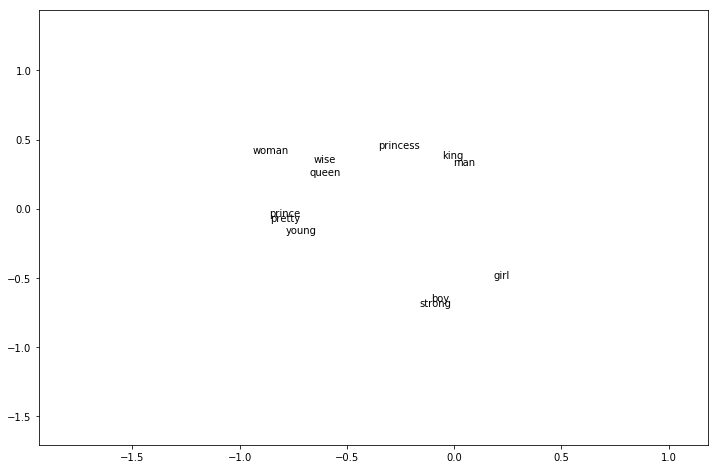

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,8))

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [26]:
w2v_df.set_index('word', inplace=True)

In [29]:
w2v_df.loc['king',:] - w2v_df.loc['queen',:]

x1    0.620960
x2    0.122454
dtype: float32

In [31]:
w2v_df.loc['man'] - w2v_df.loc['woman']

x1    0.932008
x2   -0.084588
dtype: float32